### Please do the following task

* A) x[n]={1, 2, 3, 4, 5, 6, 0, 0} & h[n]= {1, 2, 3, 4, 3, 2, 1, 0},   Check y[n]=x[n]*h[n] & y[n]=h[n]*x[n] .   
* B) Impulse response of DTS-10 & DTS-11. (at least 16 coeff.)   
* C) h[n]=DTS-10 & DTS-11, x[n]={1, 1, 1, 1, 1, 1, 0 ,0}, check y[n].   
* D) h[n]=DTS-10 & DTS-11, check the DTS solution for x[n]=u[n].   
* E) h[n]=DTS-10 & DTS-11, check the frequency response of DTS.   

In [12]:
import numpy as np
import pandas as pd
import math
from IPython.display import Image
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import plotly.express as px


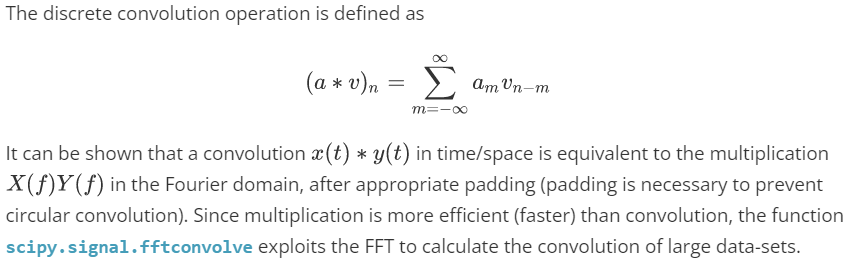

In [3]:
Image('./img/def_conv.png')

### A.)
 x[n]={1, 2, 3, 4, 5, 6, 0, 0} & h[n]= {1, 2, 3, 4, 3, 2, 1, 0},   Check y[n]=x[n]*h[n] & y[n]=h[n]*x[n] .

In [4]:
x,h = [1, 2, 3, 4, 5, 6, 0, 0],[1, 2, 3,4, 3, 2, 1, 0]
y1 = np.convolve(x,h)
y2 = np.convolve(h,x)
print("y[n]=x[n]*h[n] =",y1,"\n"
      "y[n]=h[n]*x[n] =",y2)

y[n]=x[n]*h[n] = [ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0] 
y[n]=h[n]*x[n] = [ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0]


### B.)
Impulse response of DTS-10 & DTS-11. (at least 16 coeff.)

* DTS-10  
y[n] - 0.6y[n-1] = x[n]  
y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]  
* DTS-11  
y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1]  


In [5]:
# x[n] = 1 if(n=0 ) else 0
# initial condition y[-1] = 0
# y[0] = 0 + x[0] = 1
# y[1] - 0.6 * y[0] = x[1] , y[1] = 0 + 0.6
# y[2] = 0.6 * 0.6
y_b1_out = []
for i in range(0,15,1):
    y_b1 = 0.6 ** i
    y_b1_out.append(y_b1)
# x[n] = 1 if(n=0 ) else 0
# initial condition y[-1] = 0, y[-2] = 0
# y[0] = 1/6 * 0 + 1/6 * 0 + 4 * 1 = 4 ( 1/6 ** 0) = 4
# y[1] = 1/6 * ( 4 )
# y[2] = 1/6 * ( 1/6 * 4 + 4)  
# y[3] = 1/6 * ( 1/6 * ( 1/6 * 4 + 4) + 1/6 * ( 4 ) ) = 


In [ ]:
""" y_b2_out = []
for i in range(0, 15, 1):
     """

In [16]:
fig = go.Figure()
N = 15
x_axis = np.linspace(0 , 15, N)

fig.add_traces(go.Scatter( 
                        x = x_axis, y = y1, mode='markers+lines', name= 'Conv y1'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = y2, mode='markers+lines', name= 'Conv y2'))

fig.add_traces(go.Scatter( 
                        x = x_axis, y = y_b1_out, mode='markers+lines', name= 'Impulse response b1'))


### C.)
h[n]=DTS-10 & DTS-11, x[n]={1, 1, 1, 1, 1, 1, 0 ,0}, check y[n].  

### D.)
 h[n]=DTS-10 & DTS-11, check the DTS solution for x[n]=u[n].   

### E.)
h[n]=DTS-10 & DTS-11, check the frequency response of DTS.